<a href="https://colab.research.google.com/github/xFlodz/neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%963%20%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B5%D1%82%D0%B8%20(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [13]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


In [ ]:
from tensorflow import keras

train_X = trainX / 255
test_X = testX / 255

train_Y = keras.utils.to_categorical(trainy, 10)
test_Y = keras.utils.to_categorical(testy, 10)

train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

## 1.3. Визуализируем часть данных из датасета

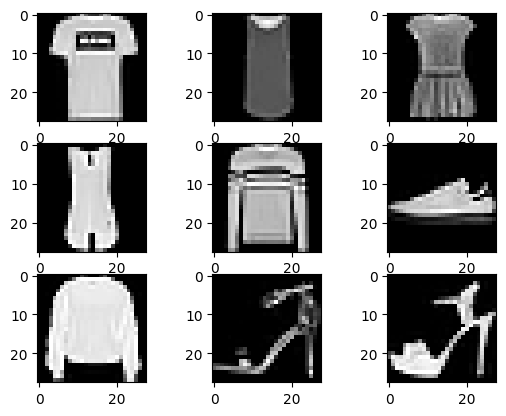

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10,  activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 1.5. Обучаем модель

In [ ]:
EPOCH = 5

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(train_X, train_Y, batch_size=50, epochs=EPOCH, validation_split=0.2)

Epoch 1/5
960/960 ━━━━━━━━━━━━━━━━━━━━ 69s 68ms/step - accuracy: 0.9526 - loss: 0.1293 - val_accuracy: 0.9180 - val_loss: 0.2405
Epoch 2/5
960/960 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.9601 - loss: 0.1088 - val_accuracy: 0.9176 - val_loss: 0.2611
Epoch 3/5
960/960 ━━━━━━━━━━━━━━━━━━━━ 85s 70ms/step - accuracy: 0.9642 - loss: 0.0993 - val_accuracy: 0.9158 - val_loss: 0.2709
Epoch 4/5
960/960 ━━━━━━━━━━━━━━━━━━━━ 81s 68ms/step - accuracy: 0.9702 - loss: 0.0822 - val_accuracy: 0.9155 - val_loss: 0.3086
Epoch 5/5
960/960 ━━━━━━━━━━━━━━━━━━━━ 80s 67ms/step - accuracy: 0.9736 - loss: 0.0722 - val_accuracy: 0.9191 - val_loss: 0.2903


## 1.6. Анализируем обученную модель. Строим график (графики) обучения

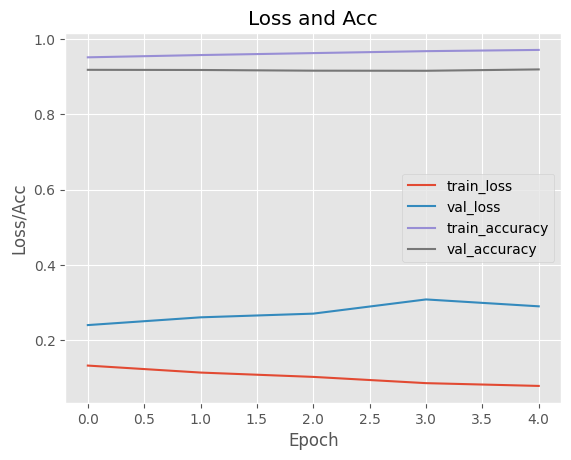

In [ ]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Acc")
plt.xlabel("Epoch")
plt.ylabel("Loss/Acc")
plt.legend()


## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [ ]:
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model
import pickle

model.save('model_fashion.keras')

labels = LabelBinarizer()
labels.fit_transform(train_Y)

with open('labels_fashion', 'wb') as f:
  f.write(pickle.dumps(labels))

print(labels.classes_)

[0 1 2 3 4 5 6 7 8 9]


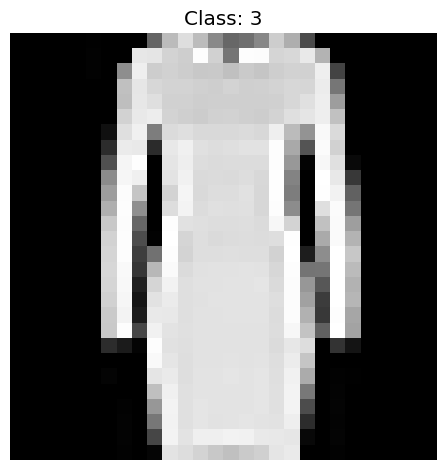

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Class	Prediction
0	0.00000
1	0.00000
2	0.00042
3	0.99958
4	0.00000
5	0.00000
6	0.00000
7	0.00000
8	0.00000
9	0.00000
Result of prediction: 3



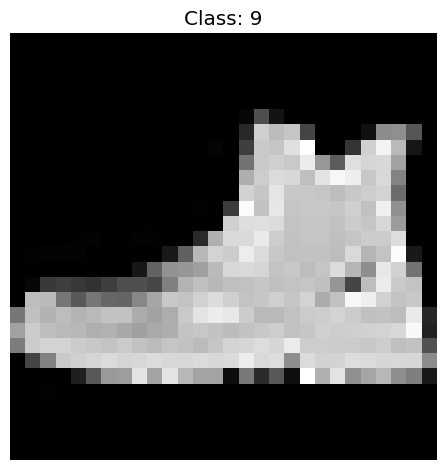

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Class	Prediction
0	0.00000
1	0.00000
2	0.00000
3	0.00000
4	0.00000
5	0.00000
6	0.00000
7	0.00060
8	0.00000
9	0.99940
Result of prediction: 9



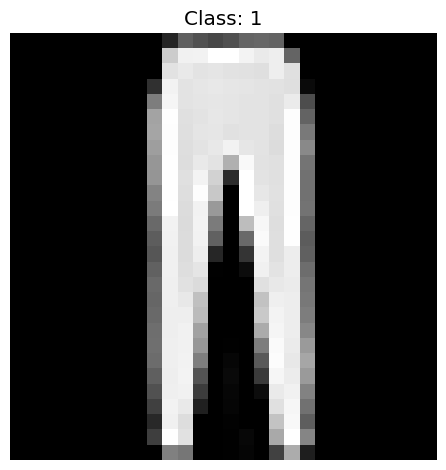

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Class	Prediction
0	0.00000
1	1.00000
2	0.00000
3	0.00000
4	0.00000
5	0.00000
6	0.00000
7	0.00000
8	0.00000
9	0.00000
Result of prediction: 1



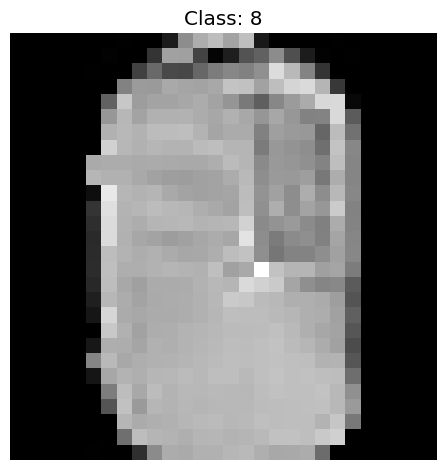

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Class	Prediction
0	0.00261
1	0.00000
2	0.00433
3	0.00028
4	0.01060
5	0.00004
6	0.00210
7	0.00032
8	0.97944
9	0.00026
Result of prediction: 8



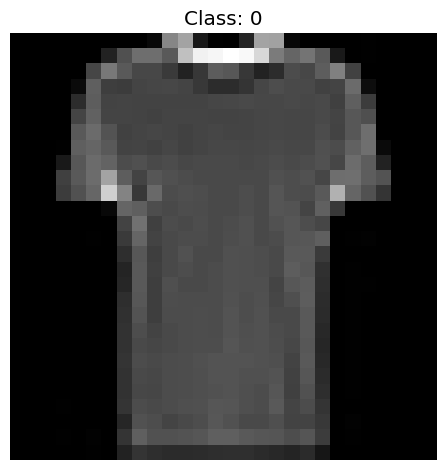

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Class	Prediction
0	0.99998
1	0.00000
2	0.00001
3	0.00000
4	0.00000
5	0.00000
6	0.00001
7	0.00000
8	0.00000
9	0.00000
Result of prediction: 0



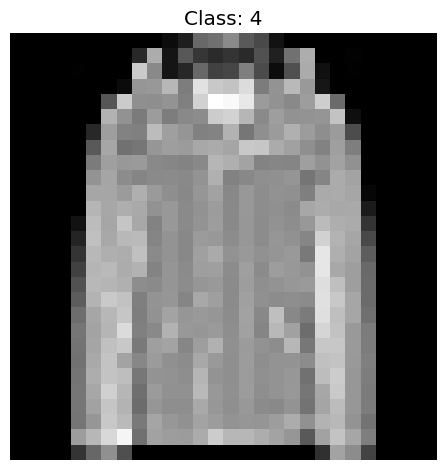

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Class	Prediction
0	0.00001
1	0.00001
2	0.00626
3	0.00000
4	0.99360
5	0.00000
6	0.00012
7	0.00000
8	0.00001
9	0.00000
Result of prediction: 4



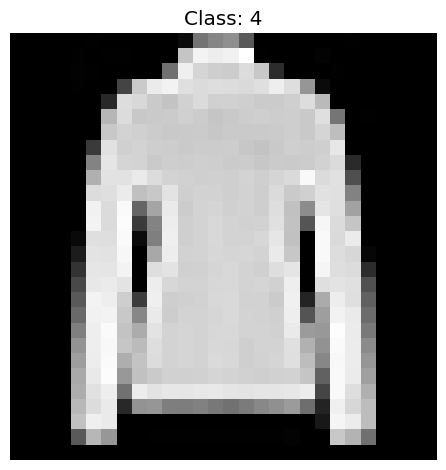

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Class	Prediction
0	0.00002
1	0.00000
2	0.39955
3	0.00001
4	0.59624
5	0.00000
6	0.00418
7	0.00000
8	0.00000
9	0.00000
Result of prediction: 4



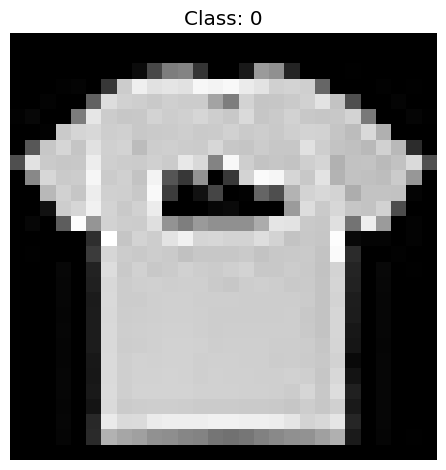

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Class	Prediction
0	0.99875
1	0.00000
2	0.00102
3	0.00000
4	0.00000
5	0.00000
6	0.00002
7	0.00000
8	0.00020
9	0.00000
Result of prediction: 0



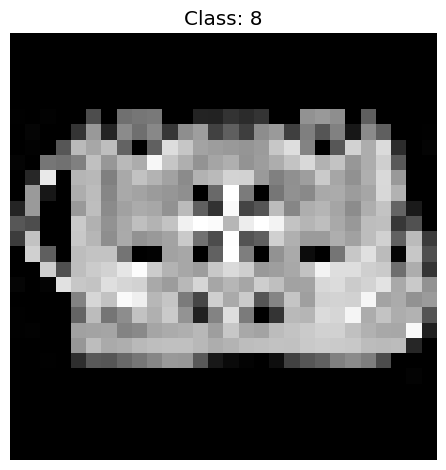

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Class	Prediction
0	0.00000
1	0.00000
2	0.00000
3	0.00000
4	0.00000
5	0.00000
6	0.00000
7	0.00000
8	1.00000
9	0.00000
Result of prediction: 8



In [ ]:
def predict_fashion(image, model_path = 'model_fashion.keras', labels_path = 'labels_fashion'):
  model = load_model(model_path)
  lb = pickle.loads(open(labels_path, 'rb').read())

  img = image.reshape(-1, 28, 28, 1)

  preds = model.predict(img)
  preds = preds[0]
  print('Class\tPrediction')
  for i in range(len(preds)):
    print(f'{lb.classes_[i]}\t{preds[i]:.5f}')
  print(f'Result of prediction: {preds.argmax()}\n')

num = np.random.randint(0, 9999, size=10)

for i in range(1, 10):
    plt.plot()
    plt.title(f'Class: {test_Y[num[i]].argmax()}')
    plt.imshow(testX[num[i]], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    predict_fashion(test_X[num[i]])

# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense, Dropout

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [ ]:
%%capture
!unzip /content/drive/MyDrive/animals_new.zip -d animals_new

In [ ]:
imagesPath = sorted(list(paths.list_images('/content/animals_new/raw-img')))
random.shuffle(imagesPath)

In [ ]:
class_dict = {}

for imagePath in imagesPath:
    label = imagePath.split(os.path.sep)[-2]
    if label not in class_dict:
        class_dict[label] = []
    class_dict[label].append(imagePath)

balanced_images = []
for label, images in class_dict.items():
    balanced_images.extend(images[:1000])

data, labels_str = [], []

for imagePath in balanced_images:
    try:
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (64, 64)).flatten()
        data.append(image)
        label = imagePath.split(os.path.sep)[-2]
        labels_str.append(label)
    except:
        continue

data = np.array(data, dtype="float") / 255.0
data = data.reshape((-1, 64, 64, 3))

In [ ]:
unique_labels = np.unique(labels_str)
label_map = {lbl: idx for idx, lbl in enumerate(unique_labels)}
labels_int = np.array([label_map[lbl] for lbl in labels_str], dtype="int")

unique_labels, label_map, labels_int

(array(['chicken', 'cow', 'dog', 'elephant'], dtype='<U8'),
 {np.str_('chicken'): 0,
  np.str_('cow'): 1,
  np.str_('dog'): 2,
  np.str_('elephant'): 3},
 array([0, 0, 0, ..., 3, 3, 3]))

In [ ]:
from tensorflow.keras.utils import to_categorical

(X_train, X_test, trainY_int, testY_int) = train_test_split(data, labels_int, test_size=0.25, random_state=52)

trainY = to_categorical(trainY_int, num_classes=len(unique_labels))
testY = to_categorical(testY_int, num_classes=len(unique_labels))

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/best_model.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.25),
    Dense(4,  activation='softmax')
])

optimizer = Adam(learning_rate=0.0003)

model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train, trainY, batch_size=50, epochs=20, validation_split=0.2, callbacks=[early_stopping, checkpoint])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 408ms/step - accuracy: 0.2704 - loss: 1.3827 - val_accuracy: 0.3617 - val_loss: 1.3243
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 325ms/step - accuracy: 0.3351 - loss: 1.3102 - val_accuracy: 0.3717 - val_loss: 1.2876
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 336ms/step - accuracy: 0.3727 - loss: 1.2731 - val_accuracy: 0.3883 - val_loss: 1.2521
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 335ms/step - accuracy: 0.3743 - loss: 1.2363 - val_accuracy: 0.4067 - val_loss: 1.2346
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 336ms/step - accuracy: 0.4157 - loss: 1.2112 - val_accuracy: 0.4767 - val_loss: 1.2194
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 335ms/step - accuracy: 0.4485 - loss: 1.1656 - val_accuracy: 0.4417 - val_loss: 1.2072
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 335ms/step - accuracy: 0.4786 - loss: 1.1440 - val_accuracy: 0.5067 - val_loss: 1.1778
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 332ms/step - accuracy: 0.4829 - loss: 1.1355 - val_accu

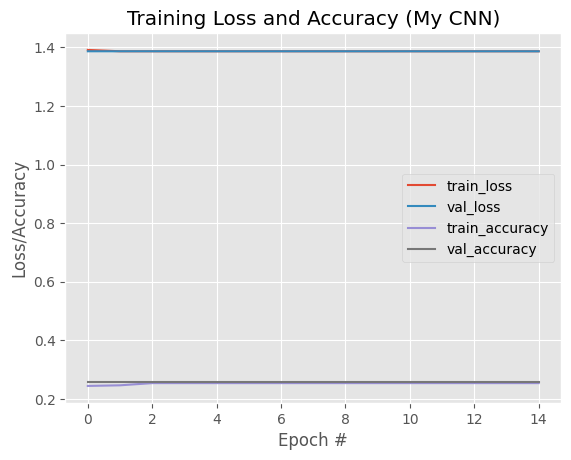

In [ ]:
N = np.arange(0, 15)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [ ]:
model_resnet_like = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax')
])

model_resnet_like.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 16)                  │         131,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 418,164 (1.60 MB)

 Trainable params: 418,164 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCH = 20
checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/best_model_resnet_like.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

model_resnet_like.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history_resnet_like = model_resnet_like.fit(X_train, trainY, batch_size=50, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.2384 - loss: 1.3942 - val_accuracy: 0.2517 - val_loss: 1.3803
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.2961 - loss: 1.3712 - val_accuracy: 0.3817 - val_loss: 1.3006
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.3713 - loss: 1.3068 - val_accuracy: 0.3617 - val_loss: 1.2830
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.3669 - loss: 1.2923 - val_accuracy: 0.4083 - val_loss: 1.2237
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.4008 - loss: 1.2842 - val_accuracy: 0.4150 - val_loss: 1.2126
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.4354 - loss: 1.2190 - val_accuracy: 0.4650 - val_loss: 1.2069
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.4537 - loss: 1.2125 - val_accuracy: 0.5083 - val_loss: 1.1537
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4867 - loss: 1.1513 - val_accuracy: 0.4950 - val_loss:

## 2.3. Сохраните полученные модели

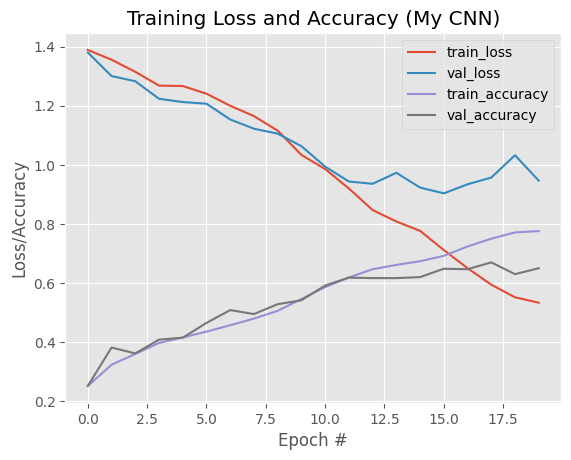

In [ ]:
N = np.arange(0, 20)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history_resnet_like.history["loss"], label="train_loss")
plt.plot(N, history_resnet_like.history["val_loss"], label="val_loss")
plt.plot(N, history_resnet_like.history["accuracy"], label="train_accuracy")
plt.plot(N, history_resnet_like.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 2.4. Загрузите обученную модель из прошлой практической работы


In [ ]:
model_1 = load_model('/content/drive/MyDrive/models_data.h5')
model_2 = load_model('/content/drive/MyDrive/best_model.keras')
model_3 = load_model('/content/drive/MyDrive/best_model_resnet_like.keras')


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

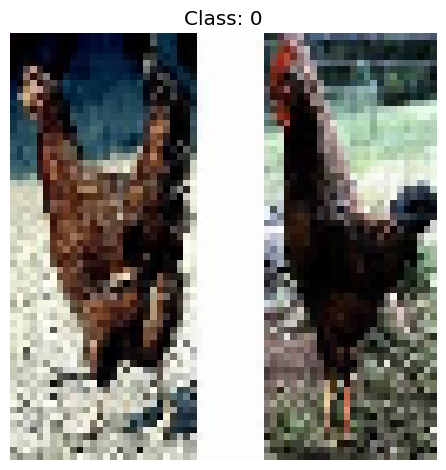

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.28148		0.24779		0.26789
cow	0.16858		0.02919		0.04374
dog	0.34120		0.69281		0.53461
elephant	0.20874		0.03021		0.15376
Result:	2		2		2



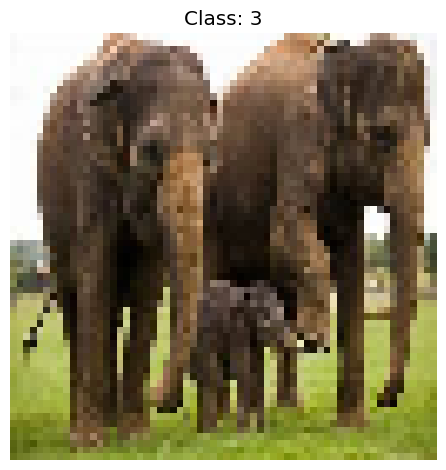

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.24990		0.00762		0.00000
cow	0.31898		0.79860		0.35671
dog	0.13486		0.00152		0.00071
elephant	0.29626		0.19227		0.64258
Result:	1		1		3



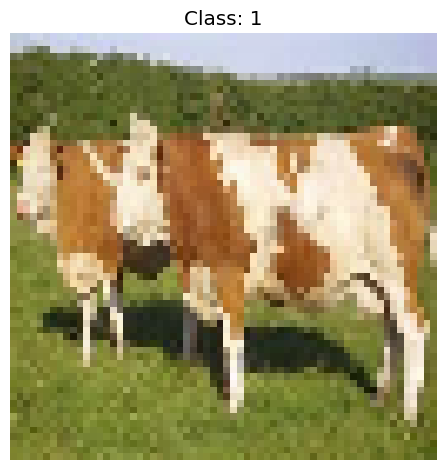

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.11567		0.00667		0.00000
cow	0.64385		0.93932		1.00000
dog	0.08356		0.00589		0.00000
elephant	0.15693		0.04812		0.00000
Result:	1		1		1



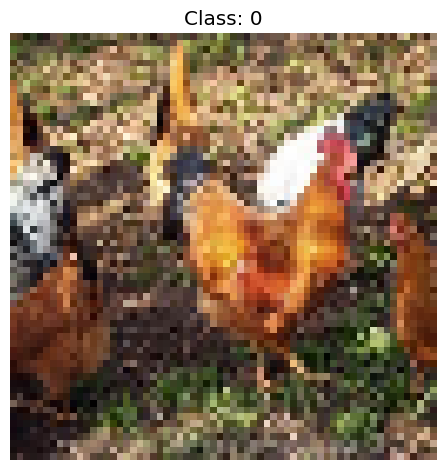

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.45507		0.46354		0.97522
cow	0.22867		0.50599		0.00009
dog	0.19736		0.01040		0.02469
elephant	0.11890		0.02007		0.00000
Result:	0		1		0



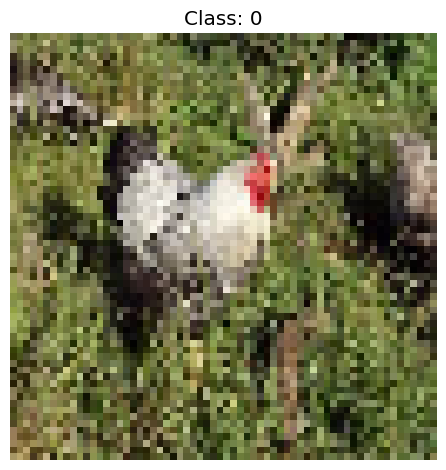

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.67985		0.52619		0.95206
cow	0.12814		0.32708		0.00418
dog	0.14613		0.01344		0.04359
elephant	0.04588		0.13329		0.00016
Result:	0		0		0



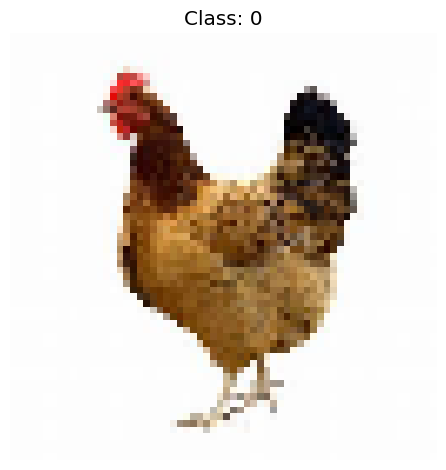

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.50688		0.50147		0.99028
cow	0.02893		0.01014		0.00000
dog	0.28812		0.47918		0.00972
elephant	0.17607		0.00920		0.00000
Result:	0		0		0



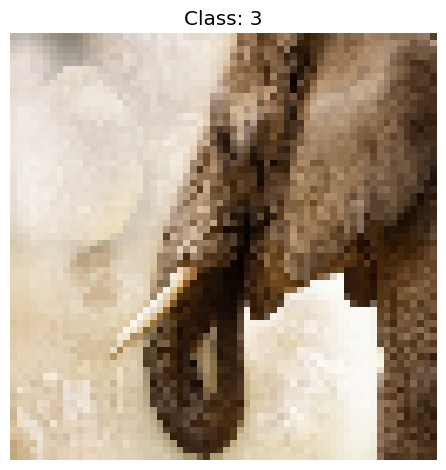

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.15266		0.15800		0.00000
cow	0.04840		0.06997		0.00054
dog	0.23323		0.31248		0.00607
elephant	0.56571		0.45955		0.99339
Result:	3		3		3



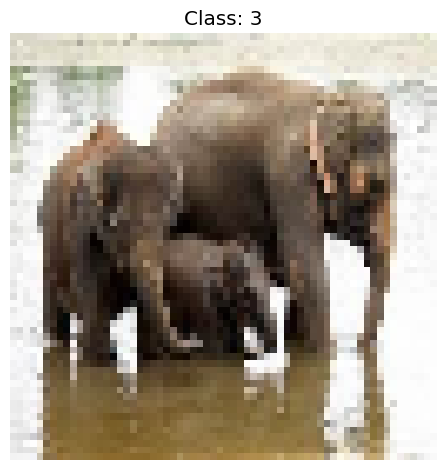

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.22438		0.01640		0.00000
cow	0.08933		0.10893		0.00104
dog	0.23261		0.01166		0.00106
elephant	0.45368		0.86301		0.99789
Result:	3		3		3



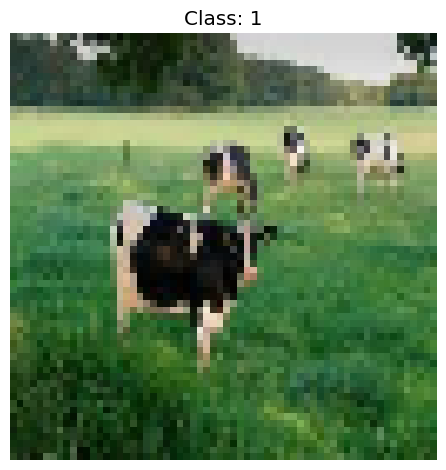

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.10390		0.21408		0.00218
cow	0.64198		0.15105		0.07716
dog	0.13524		0.47976		0.30347
elephant	0.11888		0.15511		0.61720
Result:	1		2		3



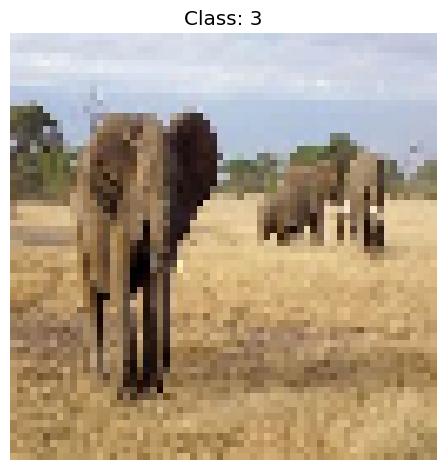

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.11389		0.18001		0.00015
cow	0.32911		0.34531		0.91277
dog	0.05925		0.25799		0.00518
elephant	0.49776		0.21669		0.08190
Result:	3		1		1



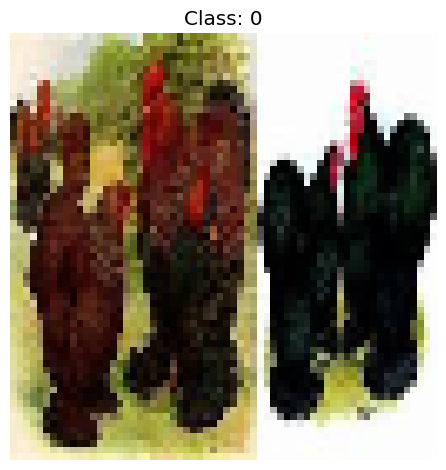

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.21969		0.08420		0.79044
cow	0.35665		0.69000		0.00404
dog	0.08131		0.00366		0.20069
elephant	0.34235		0.22214		0.00482
Result:	1		1		0



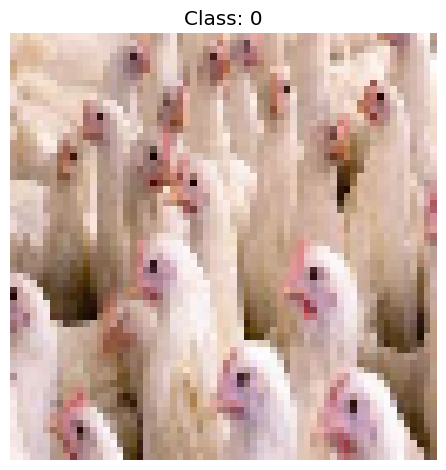

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.29118		0.26286		0.20369
cow	0.06106		0.05564		0.00104
dog	0.48590		0.62275		0.76607
elephant	0.16187		0.05875		0.02920
Result:	2		2		2



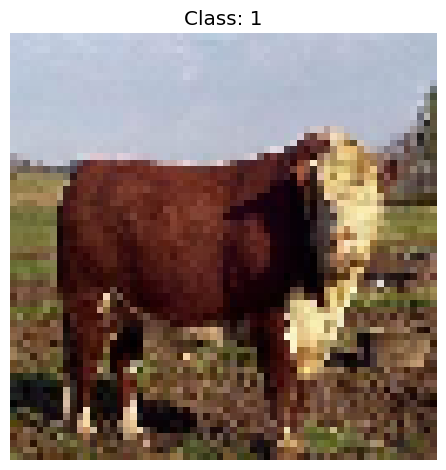

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.07216		0.08676		0.00001
cow	0.49428		0.74703		0.99984
dog	0.05279		0.00516		0.00007
elephant	0.38077		0.16105		0.00009
Result:	1		1		1



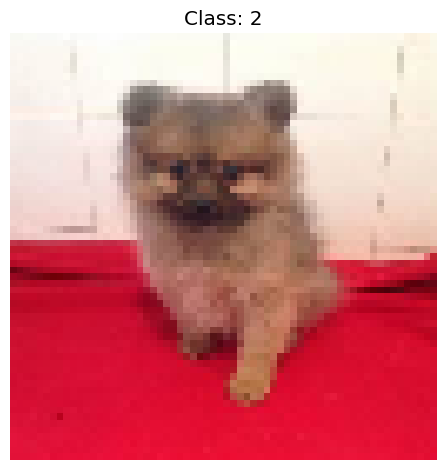

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.02466		0.48119		0.00034
cow	0.02866		0.00183		0.00000
dog	0.05923		0.47949		0.98326
elephant	0.88745		0.03749		0.01641
Result:	3		0		2



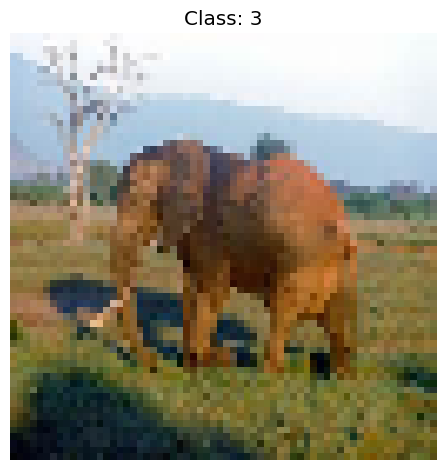

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.02881		0.07985		0.19037
cow	0.51560		0.68387		0.06723
dog	0.04157		0.02674		0.66253
elephant	0.41403		0.20954		0.07987
Result:	1		1		2



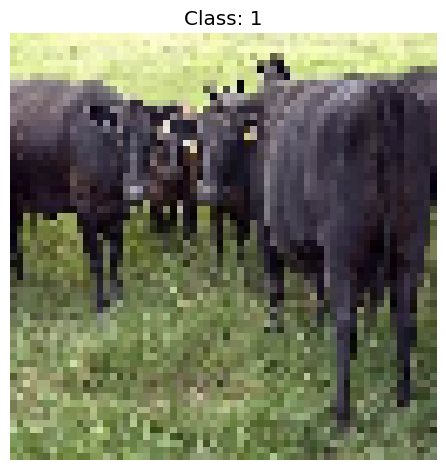

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.12805		0.41059		0.06336
cow	0.51599		0.45615		0.72873
dog	0.09778		0.09443		0.10122
elephant	0.25818		0.03882		0.10670
Result:	1		1		1



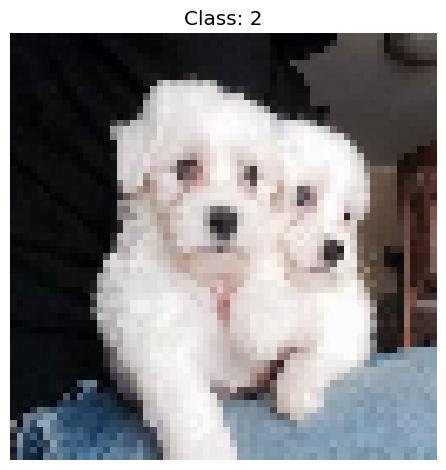

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.06623		0.26633		0.01762
cow	0.02389		0.03306		0.89017
dog	0.88809		0.67325		0.04511
elephant	0.02179		0.02736		0.04710
Result:	2		2		1



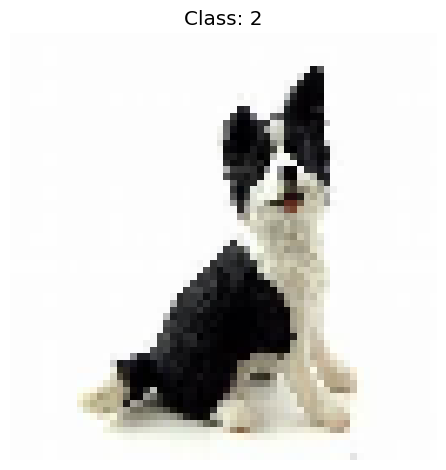

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.35238		0.28628		0.17667
cow	0.00714		0.01169		0.00033
dog	0.48507		0.69213		0.82138
elephant	0.15540		0.00990		0.00162
Result:	2		2		2



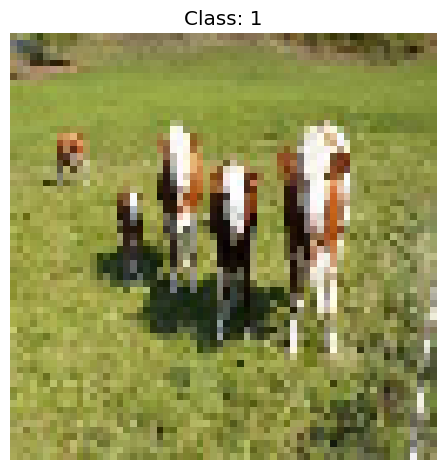

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.31305		0.25400		0.10410
cow	0.27003		0.45059		0.82782
dog	0.21450		0.10344		0.06509
elephant	0.20242		0.19197		0.00299
Result:	0		1		1



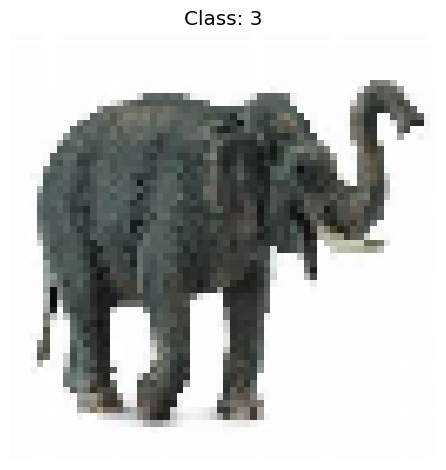

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.20907		0.01994		0.00000
cow	0.15962		0.05990		0.00579
dog	0.30197		0.05693		0.00174
elephant	0.32934		0.86323		0.99247
Result:	3		3		3



In [ ]:
def predict_class(image, labels, model_1, model_2, model_3):

  img_flat = image.flatten()
  img_flat = img_flat.reshape((1, img_flat.shape[0]))
  img = image.reshape(-1, 64, 64, 3)

  preds_1 = model_1.predict(img_flat)
  preds_1 = preds_1[0]
  preds_2 = model_2.predict(img)
  preds_2 = preds_2[0]
  preds_3 = model_3.predict(img)
  preds_3 = preds_3[0]
  print('Class\tOld_model\tMy_model\tResNet_like')
  for i in range(len(preds_1)):
    print(f'{labels.classes_[i]}\t{preds_1[i]:.5f}\t\t{preds_2[i]:.5f}\t\t{preds_3[i]:.5f}')
  print(f'Result:\t{preds_1.argmax()}\t\t{preds_2.argmax()}\t\t{preds_3.argmax()}\n')

num = np.random.randint(0, 1000, size=20)

for i in range(0, 20):
    image_show = X_test[num[i]]
    plt.plot()
    plt.title(f'Class: {testY[num[i]].argmax()}')
    plt.imshow(image_show[:, :, ::-1])
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    predict_class(X_test[num[i]], lb, model_1, model_2, model_3)

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [2]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [3]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

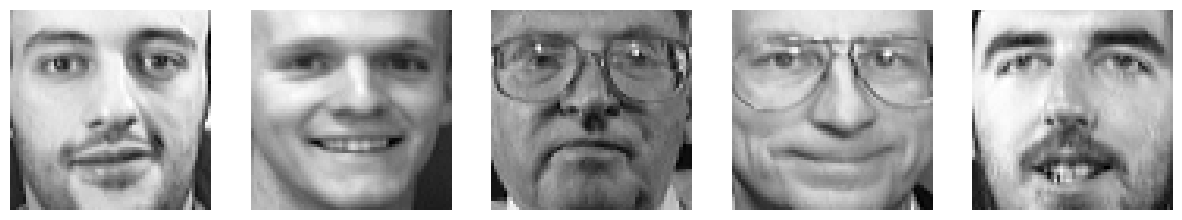

In [4]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [38]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]


In [39]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

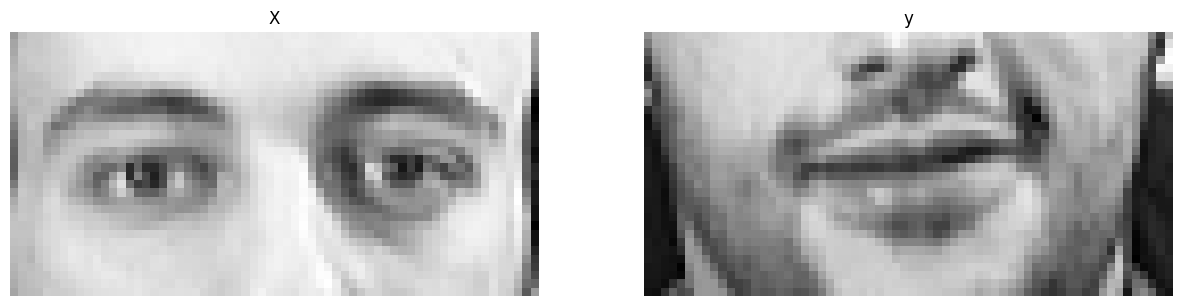

In [40]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [41]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [42]:
model_rec = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 64, 1)),
    MaxPooling2D((2,2), strides=2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),

    Dense(2048, activation='sigmoid'),
])

model_rec.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 16, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 16, 256)          │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2048)                │       2,099,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,188,992 (27.42 MB)

 Trainable params: 7,188,992 (27.42 MB)

 Non-trainable params: 0 (0.00 B)

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [43]:
model_rec.compile(optimizer='adam', loss='mse', metrics=['mae'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [45]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(patience=5)
EPOCH = 100

checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/model_face.keras", monitor="val_mae", save_best_only=True, verbose=0)

history_rec = model_rec.fit(X_train, y_train_n, batch_size=32, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.0174 - mae: 0.1049 - val_loss: 0.0172 - val_mae: 0.1059
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 546ms/step - loss: 0.0174 - mae: 0.1051 - val_loss: 0.0178 - val_mae: 0.1087
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 692ms/step - loss: 0.0162 - mae: 0.1009 - val_loss: 0.0161 - val_mae: 0.1004
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 494ms/step - loss: 0.0163 - mae: 0.1004 - val_loss: 0.0162 - val_mae: 0.1025
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 860ms/step - loss: 0.0155 - mae: 0.0980 - val_loss: 0.0152 - val_mae: 0.0955
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 526ms/step - loss: 0.0144 - mae: 0.0928 - val_loss: 0.0152 - val_mae: 0.0936
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 914ms/step - loss: 0.0140 - mae: 0.0913 - val_loss: 0.0141 - val_mae: 0.0915
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 545ms/step - loss: 0.0130 - mae: 0.0867 - val_loss: 0.0139 - val_mae: 0.0905
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 716ms/step - loss: 0.0122

## 3.5. Сделайте предсказания на тестовых данных

In [46]:
preds = model_rec.predict(X_test, batch_size=10)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


## 3.6. Посчитайте метрику качества на тестовых данных

In [47]:
# Ваш код здесь

from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

0.0702202171087265

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [48]:
pred_test = preds.reshape(preds.shape[0], 32, 64)

Отрисуйте все предсказания.

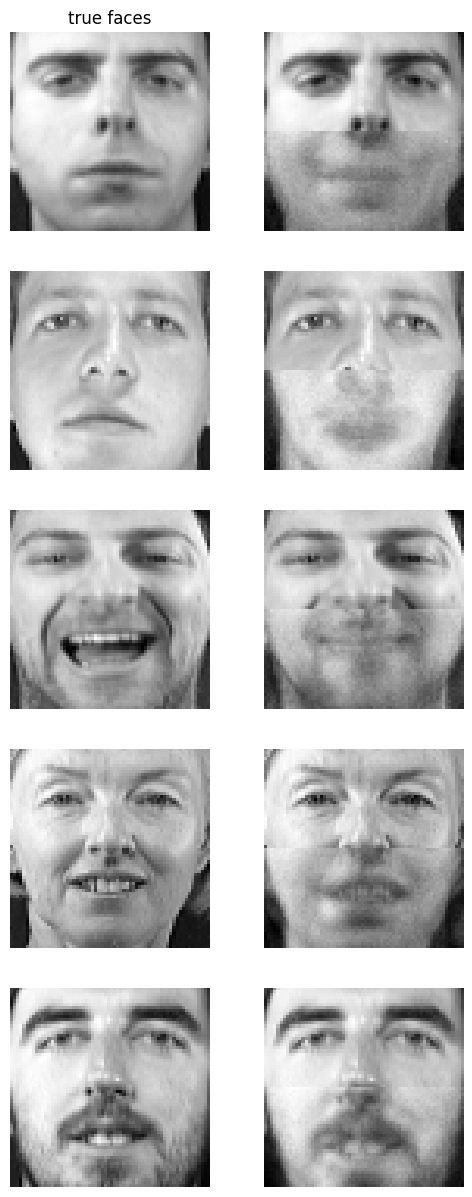

In [49]:
# Пример кода:

n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )